In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Sample taken from SciPy 2016 Scikit-learn Tutorial

# Regression Analysis

In regression we are trying to predict a continuous output variable -- in contrast to the nominal variables we were predicting in the previous classification examples. 

Let's start with a simple toy example with one feature dimension (explanatory variable) and one target variable. We will create a dataset out of a sinus curve with some noise:

In [3]:
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [22]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x * np.cos(3 * x) + rng.uniform(size=len(x))

In [23]:
# Try changing y
# y = np.sin(4 * x) + np.cos(3 * x) + x + rng.uniform(size=len(x))

In [24]:
y

array([ 3.64450382,  4.08915616,  3.62948456,  3.15307313,  2.27668674,
        1.76752795,  1.10369318,  1.31030152,  0.43121915, -0.06451328,
       -1.31966771, -0.88051264, -1.45041809, -2.40816534, -2.66844872,
       -2.78030325, -2.65315189, -2.30840654, -2.16608797, -1.97267743,
       -1.23517251, -1.22771656, -0.55477689,  0.05617909,  0.67464417,
        1.50086534,  1.35909133,  2.04520943,  2.4078512 ,  2.04888624,
        2.69417528,  2.23843399,  2.01638395,  2.69568053,  2.43408616,
        1.94232384,  1.06792741,  0.47577371,  0.68422749,  0.08989719,
       -0.53191927, -0.40029894, -1.02865898, -0.24006609, -0.89325869,
       -0.41094728, -0.60916954, -0.18569649,  0.10348604,  0.03376103,
        1.12067805,  1.21835706,  1.64526346,  1.81570796,  1.67136954,
        2.07391291,  1.23787899,  1.25903037,  0.94070314,  0.97928783,
        0.73893259,  0.27135457,  0.45063592, -0.40656032, -0.85299198,
       -0.92575804, -1.60587077, -1.14913537, -1.99335922, -1.09

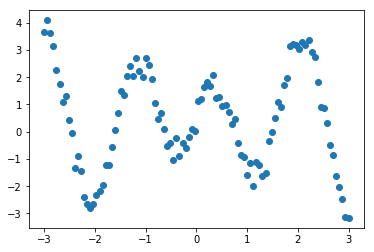

In [26]:
plt.plot(x, y, 'o');

Linear Regression
=================

The first model that we will introduce is the so-called simple linear regression. Here, we want to fit a line to the data, which 

One of the simplest models again is a linear one, that simply tries to predict the data as lying on a line. One way to find such a line is `LinearRegression` (also known as [*Ordinary Least Squares (OLS)*](https://en.wikipedia.org/wiki/Ordinary_least_squares) regression).
The interface for LinearRegression is exactly the same as for the classifiers before, only that ``y`` now contains float values, instead of classes.

As we remember, the scikit-learn API requires us to provide the target variable (`y`) as a 1-dimensional array; scikit-learn's API expects the samples (`X`) in form a 2-dimensional array -- even though it may only consist of 1 feature. Thus, let us convert the 1-dimensional `x` NumPy array into an `X` array with 2 axes:


In [27]:
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


Again, we start by splitting our dataset into a training (75%) and a test set (25%):

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Next, we use the learning algorithm implemented in `LinearRegression` to **fit a regression model to the training data**:

In [29]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

After fitting to the training data, we paramerterized a linear regression model with the following values.

In [30]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [-0.07995503]
y-axis intercept:  0.362327766706


Since our regression model is a linear one, the relationship between the target variable (y) and the feature variable (x) is defined as 

$$y = weight \times x + \text{intercept}$$.

Plugging in the min and max values into thos equation, we can plot the regression fit to our training data:

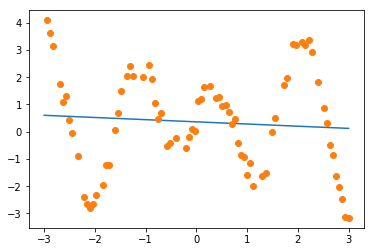

In [31]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o');

Similar to the estimators for classification in the previous notebook, we use the `predict` method to predict the target variable. And we expect these predicted values to fall onto the line that we plotted previously:

In [32]:
y_pred_train = regressor.predict(X_train)

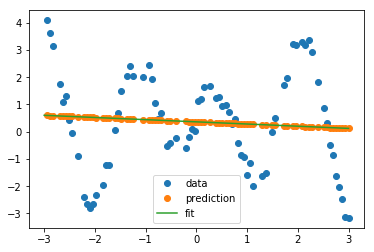

In [33]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

As we can see in the plot above, the line is able to capture the general slope of the data, but not many details.

Next, let's try the test set:

In [34]:
y_pred_test = regressor.predict(X_test)

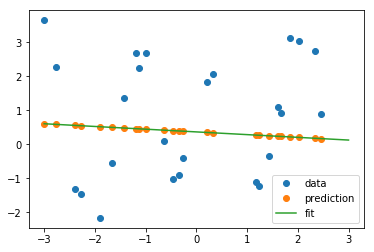

In [35]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method. For regression tasks, this is the R<sup>2</sup> score. Another popular way would be the Mean Squared Error (MSE). As its name implies, the MSE is simply the average squared difference over the predicted and actual target values

$$MSE = \frac{1}{n} \sum^{n}_{i=1} (\text{predicted}_i - \text{true}_i)^2$$

In [36]:
regressor.score(X_test, y_test)

-0.089522023813181306

KNeighborsRegression
=======================
As for classification, we can also use a neighbor based method for regression. We can simply take the output of the nearest point, or we could average several nearest points. This method is less popular for regression than for classification, but still a good baseline.

In [38]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

Again, let us look at the behavior on training and test set:

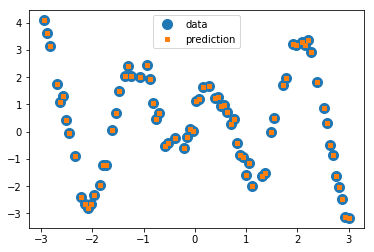

In [39]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="prediction", markersize=4)
plt.legend(loc='best');

On the training set, we do a perfect job: each point is its own nearest neighbor!

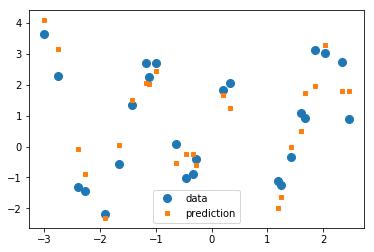

In [40]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="prediction", markersize=4)
plt.legend(loc='best');

On the test set, we also do a better job of capturing the variation, but our estimates look much messier than before.
Let us look at the R<sup>2</sup> score:

In [41]:
kneighbor_regression.score(X_test, y_test)

0.84934338190269976

Much better than before! Here, the linear model was not a good fit for our problem; it was lacking in complexity and thus under-fit our data.

Exercise
=========
Change the definition of y with a more complex formula

In [ ]:
# Code here

Exercise
=========
Compare the KNeighborsRegressor and LinearRegression on the boston housing dataset. You can load the dataset using ``sklearn.datasets.load_boston``. You can learn about the dataset by reading the ``DESCR`` attribute.

In [ ]:
# Code here